Importing the Dependencies

In [6]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

Data Collection and Processing

In [7]:
# loading the csx data to a Pandas DataFrame
heart_data = pd.read_csv('/content/heart.csv')

In [8]:
# print first 5 rows of the dataset
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [9]:
# print last 5 rows of the dataset
heart_data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [10]:
# number of rows and columns in the dataset
heart_data.shape

(1025, 14)

In [11]:
# getting some info about the data
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [12]:
# checking for missing values
heart_data.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [13]:
# statistical measures about the data
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [14]:
# Checking the distribution of Target Variable
heart_data['target'].value_counts()

,count
target,
1,526
0,499


Data visualization

 Age vs Cholesterol – Scatter Plot

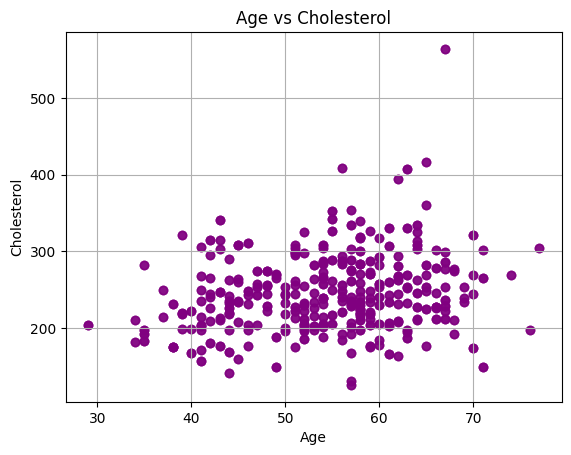

In [15]:
# Scatter plot to show relation between Age and Cholesterol
plt.scatter(heart_data['age'], heart_data['chol'], alpha=0.6, color='purple')
plt.title('Age vs Cholesterol')
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.grid(True)
plt.show()


Chest Pain Type – Bar Plot

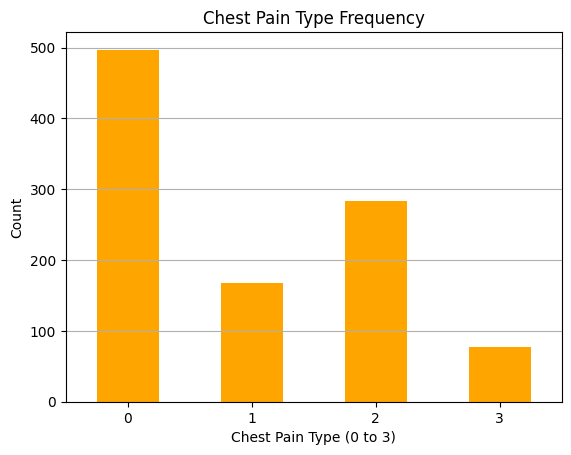

In [16]:
# Bar plot for chest pain type (cp)
heart_data['cp'].value_counts().sort_index().plot(kind='bar', color='orange')
plt.title('Chest Pain Type Frequency')
plt.xlabel('Chest Pain Type (0 to 3)')
plt.ylabel('Count')
plt.grid(axis='y')
plt.xticks(rotation=0)
plt.show()


Resting BP vs Max Heart Rate – Scatter Plot

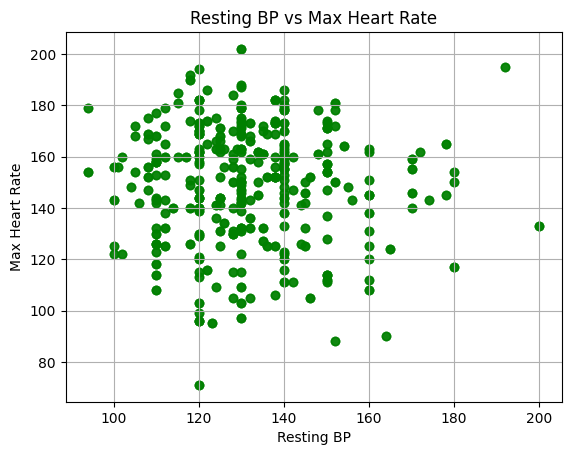

In [17]:
# Scatter plot for Resting Blood Pressure vs Max Heart Rate
plt.scatter(heart_data['trestbps'], heart_data['thalach'], alpha=0.6, color='green')
plt.title('Resting BP vs Max Heart Rate')
plt.xlabel('Resting BP')
plt.ylabel('Max Heart Rate')
plt.grid(True)
plt.show()


Correlation Heatmap

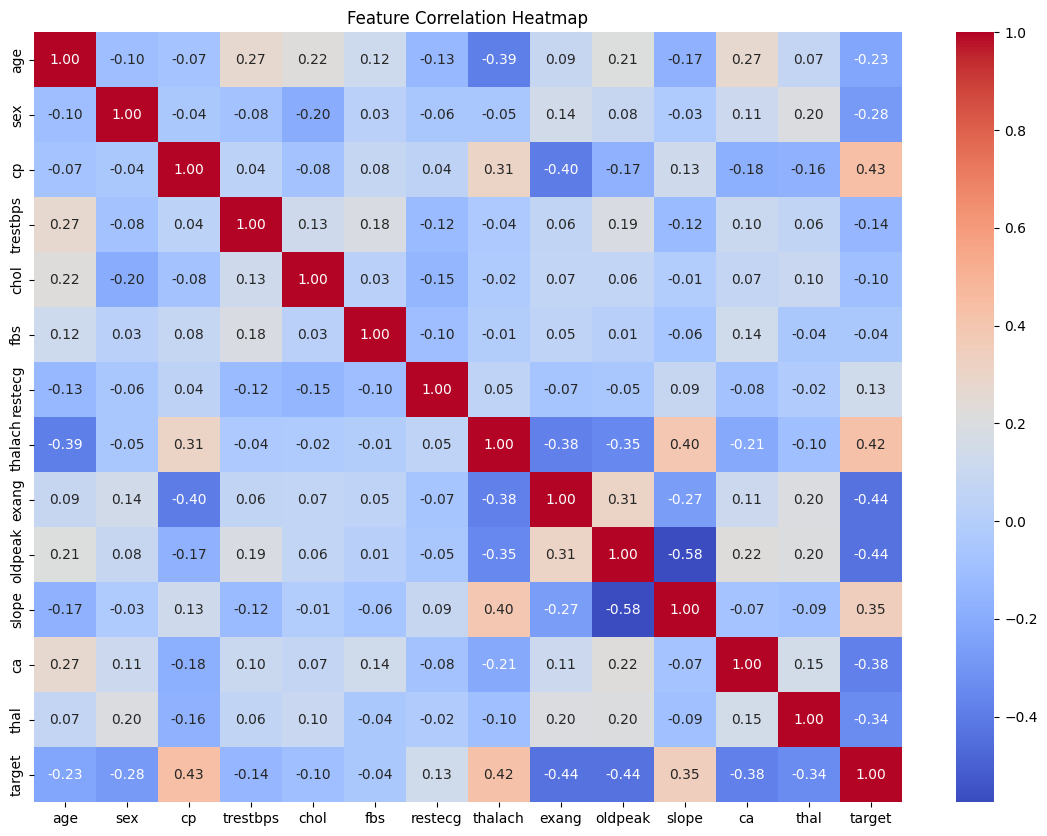

In [18]:
# Correlation heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(heart_data.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()


 Pair Plot for Key Features

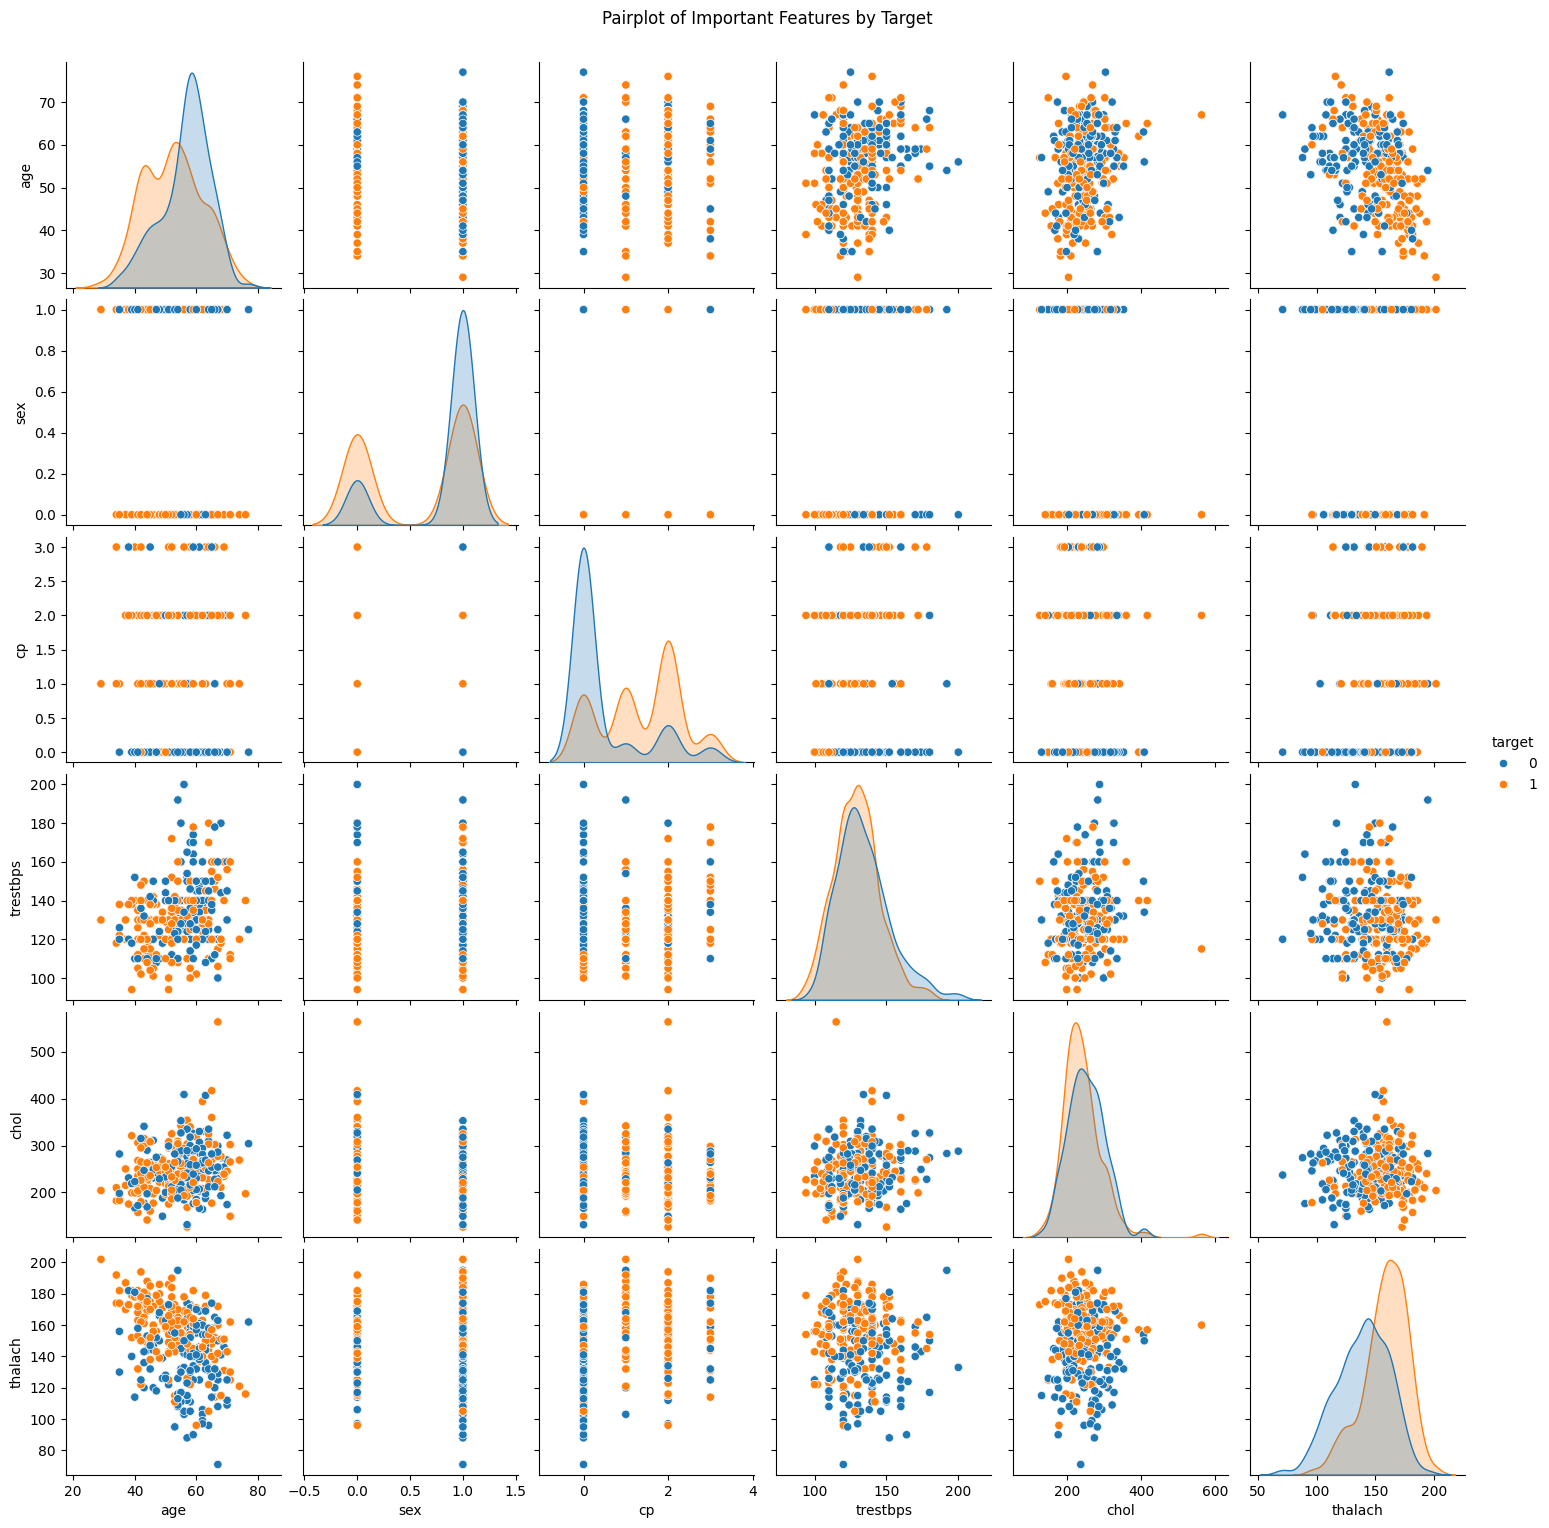

In [19]:
# Pairplot for selected important features
important_features = ['age', 'sex', 'cp', 'trestbps', 'chol', 'thalach', 'target']
sns.pairplot(heart_data[important_features], hue='target', diag_kind='kde')
plt.suptitle('Pairplot of Important Features by Target', y=1.02)
plt.show()


1 ---> Defective Heart


0 ---> Healthy Heart


Splitting the Features and the Target

In [20]:
X = heart_data.drop(columns = 'target', axis = 1)
Y = heart_data['target']

In [21]:
print(X)

      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  
0         2   2     3  
1         0   0     3  
2  

In [22]:
print(Y)

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64


Splitting the Data into Training Data and Test Data

In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify = Y, random_state = 2)

In [24]:
print(X.shape, X_train.shape, X_test.shape)

(1025, 13) (820, 13) (205, 13)


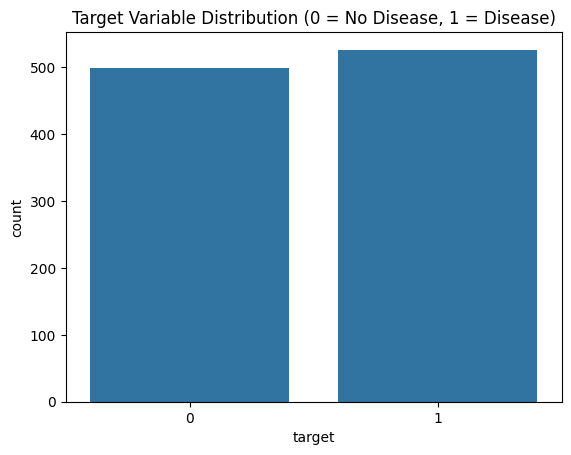

In [25]:
# Target variable distribution
sns.countplot(x='target', data=heart_data)
plt.title('Target Variable Distribution (0 = No Disease, 1 = Disease)')
plt.show()


Box Plots for Numeric Feature vs Target

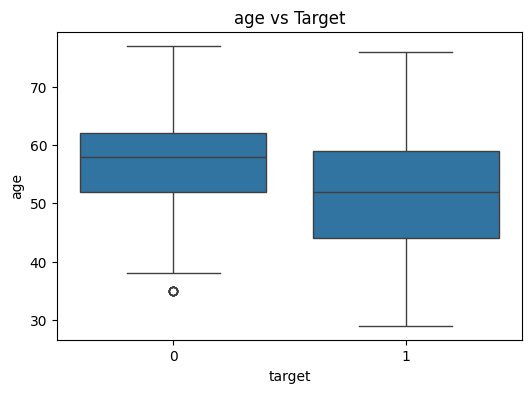

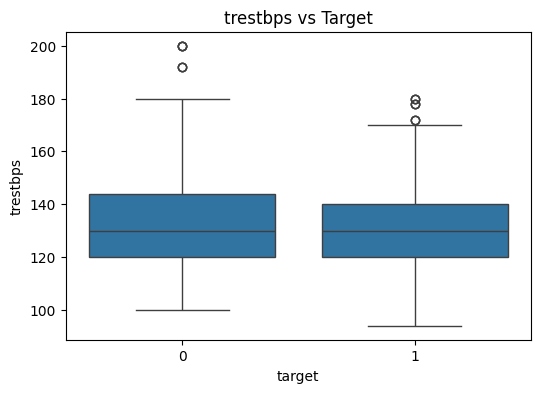

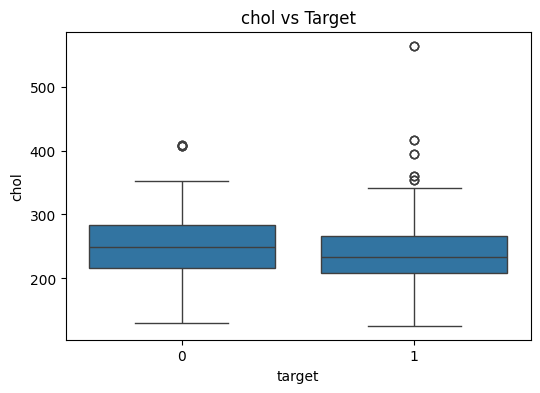

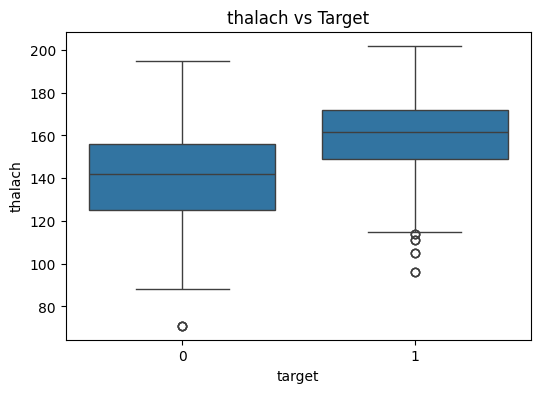

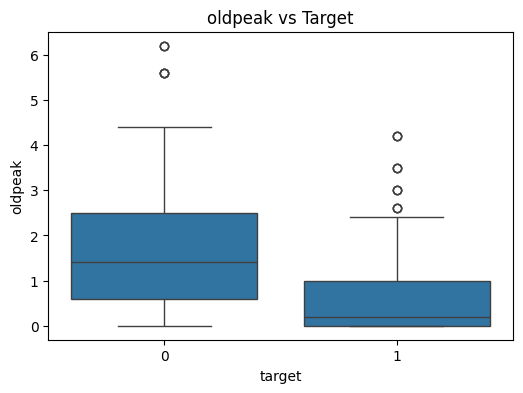

In [26]:
# Box plots to check distribution of numerical features with respect to target
numeric_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='target', y=col, data=heart_data)
    plt.title(f'{col} vs Target')
    plt.show()


Target Value Count – Bar Plot

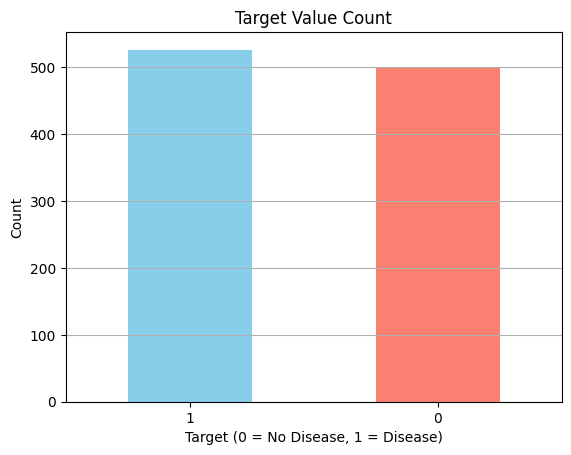

In [27]:
# Bar plot for target distribution (0: No Disease, 1: Disease)
import matplotlib.pyplot as plt

heart_data['target'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Target Value Count')
plt.xlabel('Target (0 = No Disease, 1 = Disease)')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()


Model Training

Logistic Regression

In [28]:
model = LogisticRegression()

In [29]:
# Training the LogisticRegression model with Training Data
model.fit(X_train, Y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [30]:
import joblib

# Save the trained model as a .pkl file
joblib.dump(model, 'heart_disease_model.pkl')


['heart_disease_model.pkl']

Model Evaluation

Accuracy Score

In [31]:
# accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [32]:
print('Accuracy on Training data: ', training_data_accuracy)

Accuracy on Training data:  0.8524390243902439


In [33]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [34]:
print('Accuracy on Test data: ', test_data_accuracy)

Accuracy on Test data:  0.8048780487804879


In [35]:
# Feature importance using coefficients
feature_importance = model.coef_[0]
features = X.columns

importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importance
}).sort_values(by='Importance', key=abs, ascending=False)

print(importance_df)


     Feature  Importance
1        sex   -1.490480
8      exang   -1.050787
12      thal   -0.996740
2         cp    0.803116
11        ca   -0.723186
10     slope    0.510668
9    oldpeak   -0.481499
6    restecg    0.436214
5        fbs   -0.049592
7    thalach    0.033718
3   trestbps   -0.011168
0        age    0.003739
4       chol   -0.003722


 Feature Distributions – Simple Histograms

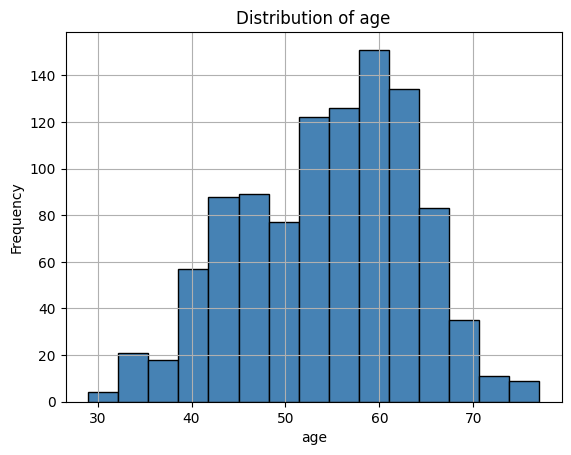

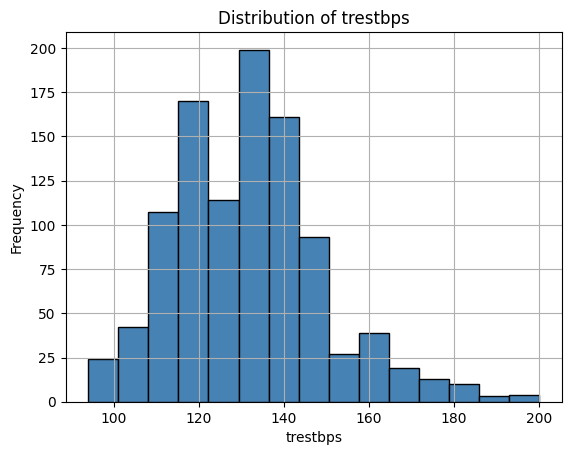

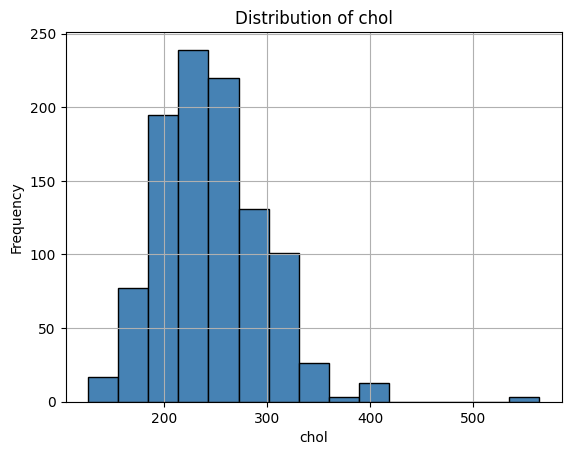

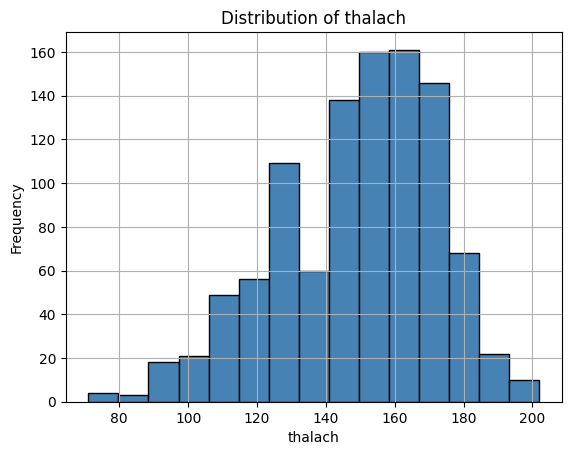

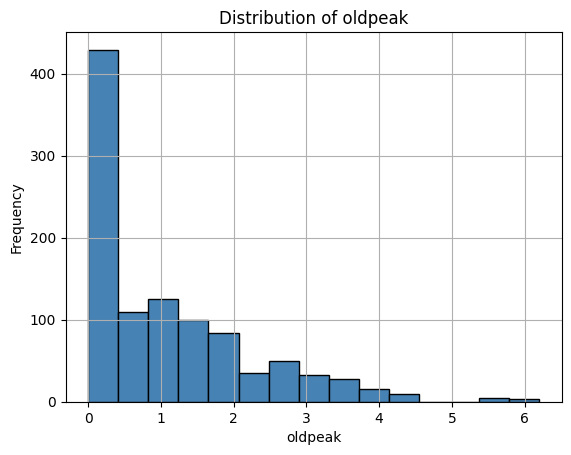

In [36]:
# Histograms of selected numerical features
features_to_plot = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
for feature in features_to_plot:
    heart_data[feature].plot(kind='hist', bins=15, title=f'Distribution of {feature}', color='steelblue', edgecolor='black')
    plt.xlabel(feature)
    plt.grid(True)
    plt.show()


Building a Predictive System

In [37]:
input_data = (58,1,0,114,318,0,2,140,0,4.4,0,3,1)

# change the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# Reshape the numpy array as we are predicting for only one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if(prediction[0] == 0):
  print('The Person does not have a Heart Disease')
else:
  print('The Person has a Heart Disease')


[0]
The Person does not have a Heart Disease


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Evaluate the model with additional classification metrics

In [38]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, f1_score, precision_score, recall_score, roc_curve
import matplotlib.pyplot as plt

# Generate predictions and probabilities
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]  # Probability estimates for ROC

# Classification metrics
print("Confusion Matrix:\n", confusion_matrix(Y_test, y_pred))
print("\nClassification Report:\n", classification_report(Y_test, y_pred))
print("F1 Score:", f1_score(Y_test, y_pred))
print("Precision:", precision_score(Y_test, y_pred))
print("Recall:", recall_score(Y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(Y_test, y_proba))


Confusion Matrix:
 [[72 28]
 [12 93]]

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.72      0.78       100
           1       0.77      0.89      0.82       105

    accuracy                           0.80       205
   macro avg       0.81      0.80      0.80       205
weighted avg       0.81      0.80      0.80       205

F1 Score: 0.8230088495575221
Precision: 0.768595041322314
Recall: 0.8857142857142857
ROC AUC Score: 0.8986666666666666


Plot ROC Curve

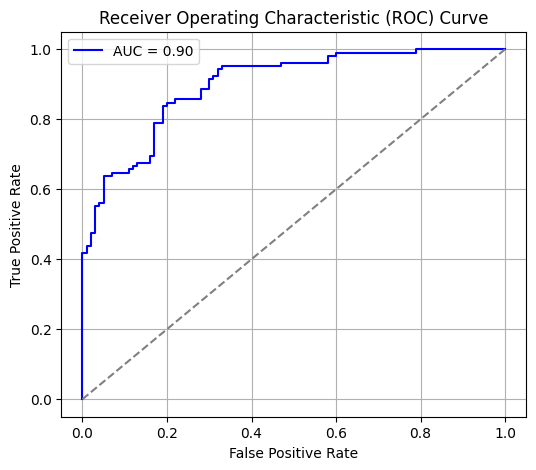

In [39]:
fpr, tpr, thresholds = roc_curve(Y_test, y_proba)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {roc_auc_score(Y_test, y_proba):.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid()
plt.show()


Hyperparameter Tuning with GridSearchCV


In [40]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']  # Required for l1 penalty
}

grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, Y_train)

print("Best parameters:", grid_search.best_params_)

# Replace your model with the best one
model = grid_search.best_estimator_


Best parameters: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}


Feature Importance from Logistic Regression

In [41]:
# Display feature importance
feature_importance = model.coef_[0]
features = X.columns

for feature, importance in zip(features, feature_importance):
    print(f'{feature}: {importance:.4f}')


age: -0.0125
sex: -1.8079
cp: 0.8017
trestbps: -0.0153
chol: -0.0054
fbs: 0.0527
restecg: 0.3044
thalach: 0.0272
exang: -1.1767
oldpeak: -0.5128
slope: 0.5178
ca: -0.7834
thal: -1.0145


Bar Chart

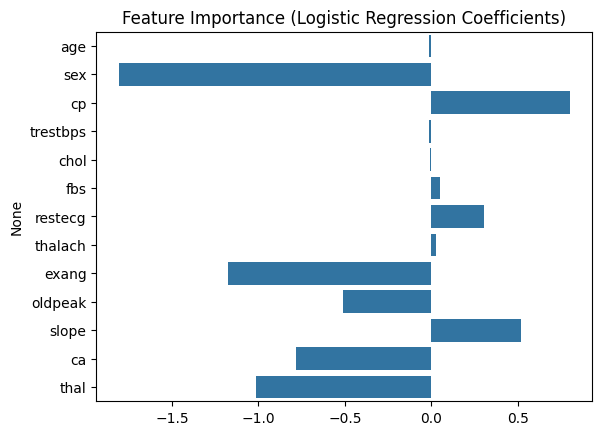

In [42]:
sns.barplot(x=feature_importance, y=features)
plt.title('Feature Importance (Logistic Regression Coefficients)')
plt.show()
